In [2]:
import pandas as pd

df_full = pd.read_excel("Titanic.xlsx")
df_full.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df_full[['Pclass','Sex','Age','Fare']]

# Convert Sex to numeric
df['Sex'] = df['Sex'].map({'male':0,'female':1})

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_10916\3066747832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male':0,'female':1})
C:\Users\hp\AppData\Local\Temp\ipykernel_10916\3066747832.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)


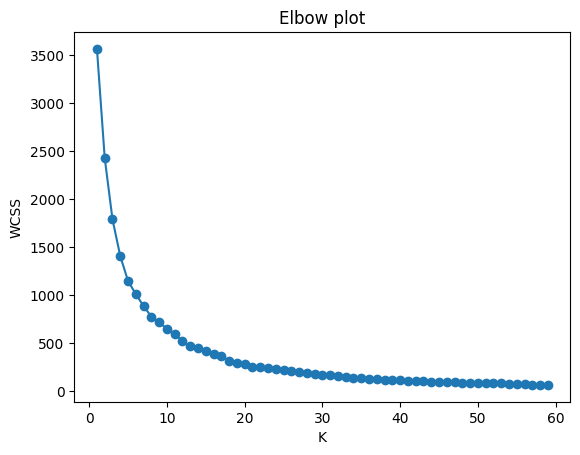

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1,60):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,60), wcss, marker='o')
plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


C:\Users\hp\AppData\Local\Temp\ipykernel_10916\34278999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X)


In [33]:
df

,Pclass,Sex,Age,Fare,Cluster
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,2
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,2
888,3,1,28.0,23.4500,2
889,1,0,26.0,30.0000,1


In [34]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.42286134464621117


| Score    | Meaning              |
| -------- | -------------------- |
| **+1**   | Perfect clustering   |
| **~0.5** | Good clustering      |
| **~0**   | Overlapping clusters |
| **< 0**  | Wrong clustering     |


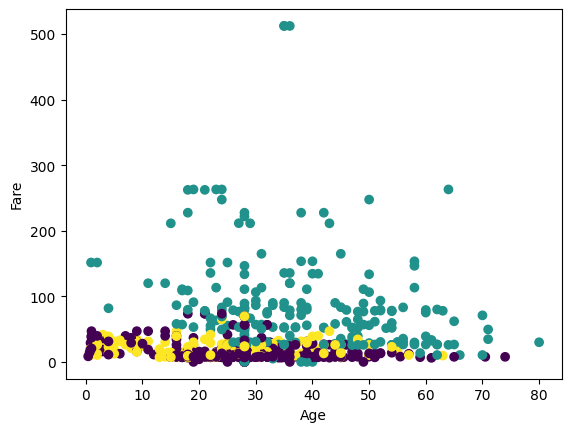

In [35]:
plt.scatter(df['Age'], df['Fare'], c=df['Cluster'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


In [10]:
df.query("Cluster == 0").nunique()

Pclass      1
Sex         1
Age        13
Fare       42
Cluster     1
dtype: int64

In [11]:
df.query("Cluster == 0")

,Pclass,Sex,Age,Fare,Cluster
0,3,0,22.0,7.2500,0
12,3,0,20.0,8.0500,0
37,3,0,21.0,8.0500,0
51,3,0,21.0,7.8000,0
60,3,0,22.0,7.2292,0
...,...,...,...,...,...
836,3,0,21.0,8.6625,0
840,3,0,20.0,7.9250,0
844,3,0,17.0,8.6625,0
876,3,0,20.0,9.8458,0


In [12]:
df.query("Cluster == 1").index

Index([  1,   3,  61, 136, 151, 166, 218, 230, 256, 257, 290, 291, 306, 307,
       309, 310, 329, 356, 369, 375, 383, 393, 412, 435, 457, 486, 504, 520,
       537, 539, 540, 558, 577, 585, 627, 641, 669, 710, 759, 781, 809, 835,
       842, 849, 853, 887],
      dtype='int64')

In [13]:
df_full.loc[df.query("Cluster == 1").index,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
61,62,1,1,"Icard, Miss Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
136,137,1,1,"Newsom, Miss Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
218,219,1,1,"Bazzani, Miss Albina",female,32.0,0,0,11813,76.2917,D15,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
257,258,1,1,"Cherry, Miss Gladys",female,30.0,0,0,110152,86.5000,B77,S


In [15]:
df_full.loc[df.query("Cluster == 2").index,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
863,864,0,3,"Sage, Miss Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
882,883,0,3,"Dahlberg, Miss Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [16]:
df_full.loc[df.query("Cluster == 2").index,:].nunique()

PassengerId    97
Survived        2
Pclass          1
Name           97
Sex             1
Age            19
SibSp           6
Parch           5
Ticket         91
Fare           51
Cabin           3
Embarked        3
dtype: int64

In [36]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df_full['freq_embark'] = df_full['Embarked'].map(df_full['Embarked'].value_counts())

In [41]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,freq_embark
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,644.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,168.0
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,644.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,644.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,644.0
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,644.0
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,644.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,168.0


In [43]:
df_full['Title'] = df_full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major',
               'Rev','Sir','Jonkheer','Dona']

df_full['Title'] = df_full['Title'].replace(rare_titles, 'Rare')
df_full['Title'] = df_full['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_10916\3099826612.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_full['Title'] = df_full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [44]:
title_mean = df_full.groupby('Title')['Survived'].mean()
df_full['TitleEncoded'] = df_full['Title'].map(title_mean)


In [45]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,freq_embark,Title,TitleEncoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,644.0,Mr,0.156673
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,168.0,Mrs,0.793651
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,644.0,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,644.0,Mrs,0.793651
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,644.0,Mr,0.156673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,644.0,Rare,0.347826
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,644.0,NaN,NaN
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,644.0,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,168.0,Mr,0.156673


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df

,Pclass,Sex,Age,Fare,Cluster
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,2
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,2
888,3,1,28.0,23.4500,2
889,1,0,26.0,30.0000,1


In [47]:
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

vif_data["VIF"] = [
    variance_inflation_factor(df.values, i)
    for i in range(df.shape[1])
]

print(vif_data)


   Feature       VIF
0   Pclass  3.229641
1      Sex  6.088232
2      Age  4.036243
3     Fare  1.549826
4  Cluster  6.808775
